In [1]:
import pandas as pd 
import scipy.spatial
import scipy.cluster
import numpy as np
import json
import matplotlib.pyplot as plt
from functools import reduce

In [170]:
adj=pd.read_table("adj_filter.txt", sep="\t", header=0,index_col=0,encoding='utf8')
distMat = 1-adj
distMat

,OTU_1745,OTU_3730,OTU_4411,OTU_4978,OTU_5026,OTU_8640,OTU_47916,OTU_111986,OTU_112964,OTU_113212,...,OTU_566300,OTU_566886,OTU_573607,OTU_573812,OTU_575937,OTU_580487,OTU_584527,OTU_586693,OTU_593321,summed-nonfeat-rows
OTU_1745,0.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000
OTU_3730,1.0,0.0,1.0,1.0,1.000000,1.000000,0.586713,1.000000,1.0,1.000000,...,0.586476,1.0,1.451146,1.0,0.585096,1.0,1.000000,1.0,1.000000,1.000000
OTU_4411,1.0,1.0,0.0,1.0,1.000000,1.000000,1.000000,0.575899,1.0,0.566091,...,0.533234,1.0,1.000000,1.0,0.595357,1.0,1.000000,1.0,1.000000,1.000000
OTU_4978,1.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000
OTU_5026,1.0,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.595582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_580487,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.434324,1.0,1.000000,...,1.000000,1.0,1.000000,1.0,1.000000,0.0,1.000000,1.0,1.000000,1.000000
OTU_584527,1.0,1.0,1.0,1.0,1.000000,1.000000,1.570730,1.454085,1.0,1.491825,...,1.506094,1.0,0.502876,1.0,1.459446,1.0,0.000000,1.0,1.000000,0.464901
OTU_586693,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.466012,1.0,0.418614,...,0.429368,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.0,1.000000,1.000000
OTU_593321,1.0,1.0,1.0,1.0,1.000000,0.587161,1.573350,1.000000,1.0,1.463892,...,1.435145,1.0,0.512896,1.0,1.520869,1.0,1.000000,1.0,0.000000,0.527465


/Users/mac/Downloads/yes/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


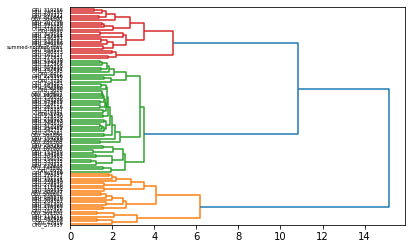

In [168]:
#print(distMat[1:5])
clusters = scipy.cluster.hierarchy.linkage(distMat, method='ward')
T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )

labels = list(distMat.columns.values)
id2name = dict(enumerate(labels))
 
# Draw dendrogram using matplotlib to scipy-dendrogram.pdf
scipy.cluster.hierarchy.dendrogram(clusters, labels=labels, orientation='right')
plt.savefig("scipy-dendrogram.png")

In [160]:
T.id

182

In [171]:
def add_node(node, parent ):
    # First create the new node and append it to its parent's children
    newNode = dict( node_id=node.id, children=[] )
    parent["children"].append( newNode )
 
    # Recursively add the current node's children
    if node.left: add_node( node.left, newNode )
    if node.right: add_node( node.right, newNode )
 
# Initialize nested dictionary for d3, then recursively iterate through tree
d3Dendro = dict(children=[], name="Root1")
add_node( T, d3Dendro )
#print(d3Dendro)

{'children': [{'node_id': 182, 'children': [{'node_id': 180, 'children': [{'node_id': 173, 'children': [{'node_id': 151, 'children': [{'node_id': 86, 'children': []}, {'node_id': 98, 'children': [{'node_id': 6, 'children': []}, {'node_id': 75, 'children': []}]}]}, {'node_id': 158, 'children': [{'node_id': 63, 'children': []}, {'node_id': 97, 'children': [{'node_id': 9, 'children': []}, {'node_id': 82, 'children': []}]}]}]}, {'node_id': 178, 'children': [{'node_id': 170, 'children': [{'node_id': 122, 'children': [{'node_id': 16, 'children': []}, {'node_id': 67, 'children': []}]}, {'node_id': 164, 'children': [{'node_id': 133, 'children': [{'node_id': 21, 'children': []}, {'node_id': 74, 'children': []}]}, {'node_id': 148, 'children': [{'node_id': 28, 'children': []}, {'node_id': 134, 'children': [{'node_id': 79, 'children': []}, {'node_id': 106, 'children': [{'node_id': 77, 'children': []}, {'node_id': 89, 'children': []}]}]}]}]}]}, {'node_id': 176, 'children': [{'node_id': 128, 'childr

In [172]:
tree=[]
 
def preorder(root):
    if not root.is_leaf():
        str1=",".join([distMat.columns.values[i] for i in root.left.pre_order()])
        str2=",".join([distMat.columns.values[i] for i in root.right.pre_order()])
        tree.append([str1,str2])
    if root.get_left() is not None:
        preorder(root.get_left())
    if root.get_right() is not None:
        preorder(root.get_right())
preorder(T)
 
#print(tree)

In [345]:
tree = []

def get_group(str1,str2):
    level = pd.DataFrame(str1.split(","))
    str1_l = str1.split(",")
    str11=[1 for i in range(len(str1_l))]
    str2_l = str2.split(",")
    str22=[2 for i in range(len(str2_l))]
    test = { 'group':str11+str22}
    df_test1 = pd.DataFrame(test,index=str1_l+str2_l)
    return df_test1

dis_matrix = DistanceMatrix(list(distMat.values))
pv = []

def preorder(root):
    if not root.is_leaf():
        str1=",".join([distMat.columns.values[i] for i in root.left.pre_order()])
        str2=",".join([distMat.columns.values[i] for i in root.right.pre_order()])
        df_test = get_group(str1,str2)
        result = pd.concat([distMat, df_test], axis=1)
        result = result.dropna(axis=0, how='any')
        group = list(result["group"])
        result=result[list(result.index.values)]
        dis_matrix = DistanceMatrix(list(result.values))
        obs = permanova(dis_matrix, group)
        pvalue = obs["p-value"]
        if pvalue < 0.05:
            pv.append(pvalue)
            print(str1,str2)
            tree.append([str1.split(","),str2.split(",")])
    if pvalue <0.05:
        preorder(root.get_left())
        preorder(root.get_right())


 
preorder(T)
print(len(tree))
print(pv)
#print(tree[0])
#dist_str1 = distMat[str1.split(",")].loc[str1.split(",")]
#dist_str2 = distMat[str2.split(",")].loc[str2.split(",")]


OTU_575937,OTU_47916,OTU_546864,OTU_347619,OTU_113212,OTU_566300,OTU_151955,OTU_510452,OTU_156065,OTU_541300,OTU_204561,OTU_560615,OTU_548876,OTU_586693,OTU_305277,OTU_349634,OTU_111986,OTU_278816,OTU_239649,OTU_328245,OTU_151114,OTU_278437 OTU_561789,OTU_4978,OTU_148890,OTU_222635,OTU_279571,OTU_533525,OTU_156032,OTU_204462,OTU_134163,OTU_153450,OTU_160908,OTU_580487,OTU_254262,OTU_286368,OTU_223583,OTU_154268,OTU_566886,OTU_327961,OTU_342757,OTU_259452,OTU_317096,OTU_248618,OTU_529793,OTU_218024,OTU_279590,OTU_1745,OTU_216341,OTU_218287,OTU_281116,OTU_224117,OTU_573812,OTU_343296,OTU_156816,OTU_160992,OTU_214611,OTU_5026,OTU_136280,OTU_563862,OTU_144381,OTU_3730,OTU_513331,OTU_226506,OTU_4411,OTU_156545,OTU_257891,OTU_559239,OTU_112964,OTU_534479,OTU_152039,OTU_277931,OTU_161227,OTU_546873,OTU_584527,summed-nonfeat-rows,OTU_573607,OTU_340198,OTU_533587,OTU_146397,OTU_257244,OTU_323164,OTU_8640,OTU_318683,OTU_222080,OTU_391129,OTU_207796,OTU_364090,OTU_511844,OTU_593321,OTU_240591,OTU

In [376]:
#cur_list=[["ab","abc"],["ab","abc","abcd"],["abcd","abcde"],["ab","abc","abcd","abcde"]]
#需要先去重
out_list=list()
for i in tree:
    a = 0
    b = 0
    for j in tree:
        if set(i[0]) > set(j[0]) or set(j[0]) > set(j[1]):
            a = a+1
        if set(i[1]) > set(j[0]) or set(j[0]) > set(j[1]):
            b = b+1
    if a == 0:
        out_list.append(i[0])
    if b == 0:
        out_list.append(i[1])

print(len(out_list))
print(out_list)


9
[['OTU_575937', 'OTU_47916', 'OTU_546864', 'OTU_347619', 'OTU_113212', 'OTU_566300', 'OTU_151955', 'OTU_510452', 'OTU_156065', 'OTU_541300', 'OTU_204561', 'OTU_560615', 'OTU_548876', 'OTU_586693', 'OTU_305277', 'OTU_349634', 'OTU_111986', 'OTU_278816', 'OTU_239649', 'OTU_328245', 'OTU_151114', 'OTU_278437'], ['OTU_254262', 'OTU_286368', 'OTU_223583', 'OTU_154268', 'OTU_566886', 'OTU_327961', 'OTU_342757', 'OTU_259452', 'OTU_317096', 'OTU_248618', 'OTU_529793', 'OTU_218024', 'OTU_279590', 'OTU_1745', 'OTU_216341', 'OTU_218287', 'OTU_281116', 'OTU_224117', 'OTU_573812', 'OTU_343296', 'OTU_156816', 'OTU_160992', 'OTU_214611', 'OTU_5026', 'OTU_136280', 'OTU_563862', 'OTU_144381', 'OTU_3730', 'OTU_513331', 'OTU_226506', 'OTU_4411', 'OTU_156545', 'OTU_257891', 'OTU_559239', 'OTU_112964', 'OTU_534479'], ['OTU_561789', 'OTU_4978', 'OTU_148890'], ['OTU_222635', 'OTU_279571', 'OTU_533525', 'OTU_156032', 'OTU_204462'], ['OTU_134163', 'OTU_153450', 'OTU_160908', 'OTU_580487'], ['OTU_152039', 'OT

In [383]:
k_group = {}
for i in range(0,len(out_list)):
    k_group["CAG%s"%(i+1)] = out_list[i]
    
#print(k_group["CAG1"])

key = list(k_group.keys())
str_group_a = []
str_key = []
for i in key:
    str_len=[i for j in range(len(k_group[i]))]
    str_group_a.extend(str_len)
    str_key.extend(k_group[i])
test1 = {"group":str_group_a}

#print(str_group_a)
#print(str_key)
df_Final = pd.DataFrame(test1,index=str_key)
df_Final

,group
OTU_575937,CAG1
OTU_47916,CAG1
OTU_546864,CAG1
OTU_347619,CAG1
OTU_113212,CAG1
...,...
OTU_364090,CAG9
OTU_511844,CAG9
OTU_593321,CAG9
OTU_240591,CAG9


In [323]:
root = T
tree = []
pv = []
if not root.is_leaf():
    str1=",".join([distMat.columns.values[i] for i in root.left.pre_order()])
    str2=",".join([distMat.columns.values[i] for i in root.right.pre_order()])
    #tree.append([str1,str2])
    print(str1.split(","))
    print(len(str1.split(",")))
    df_test = get_group(str1,str2)
    result = pd.concat([distMat, df_test], axis=1)
    obs = permanova(dis_matrix, result["group"])
    pvalue = obs["p-value"]
    
    if pvalue < 0.05:
        root = root.get_left()
        str1=",".join([distMat.columns.values[i] for i in root.left.pre_order()])
        str2=",".join([distMat.columns.values[i] for i in root.right.pre_order()])
        #tree.append([str1,str2])
        df_test = get_group(str1,str2)
        result = pd.concat([distMat, df_test], axis=1)
        result=result.dropna(axis=0, how='any')
        group = list(result["group"])
        result=result[list(result.index.values)]
        dis_matrix1 = DistanceMatrix(list(result.values))
        obs = permanova(dis_matrix1, group)
        pvalue = obs["p-value"]
        print(obs)
    else:
        pv.append(pvalue)
        tree.append([str1,str2])

#rooted(root)

print(tree)
print(pv)

['OTU_575937', 'OTU_47916', 'OTU_546864', 'OTU_347619', 'OTU_113212', 'OTU_566300', 'OTU_151955', 'OTU_510452', 'OTU_156065', 'OTU_541300', 'OTU_204561', 'OTU_560615', 'OTU_548876', 'OTU_586693', 'OTU_305277', 'OTU_349634', 'OTU_111986', 'OTU_278816', 'OTU_239649', 'OTU_328245', 'OTU_151114', 'OTU_278437']
22
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      22
number of groups                  2
test statistic             1.059608
p-value                       0.431
number of permutations          999
Name: PERMANOVA results, dtype: object
[]
[]


In [199]:
level = pd.DataFrame(str1.split(","))
str1_l = str1.split(",")
#print(len(str1_l))
str11=[1 for i in range(len(str1_l))]
#print(str11)
#print(str1_l)
str2_l = str2.split(",")
#print(len(str1_l))
str22=[2 for i in range(len(str2_l))]
#print(str22)
#print(str2_l)
test = { 'group':str11+str22}
df_test = pd.DataFrame(test,index=str1_l+str2_l)
df_test

,group
OTU_575937,1
OTU_47916,1
OTU_546864,1
OTU_347619,1
OTU_113212,1
...,...
OTU_364090,2
OTU_511844,2
OTU_593321,2
OTU_240591,2


In [205]:
import skbio
from skbio import DistanceMatrix
from skbio.stats.distance import permanova
dis_matrix = DistanceMatrix(list(distMat.values))
obs = permanova(dis_matrix, result["group"])
if obs["p-value"] < 0.05:
    print(1)
print(obs["p-value"])

1
0.001


In [200]:
import pandas as pd
import numpy as np
#df = pd.DataFrame(np.random.randn(3,4) ,columns=list('abcd'))
#print(df)
#print(DistanceMatrix(list(distMat.values)))
result = pd.concat([distMat, df_test], axis=1)
result

,OTU_1745,OTU_3730,OTU_4411,OTU_4978,OTU_5026,OTU_8640,OTU_47916,OTU_111986,OTU_112964,OTU_113212,...,OTU_566886,OTU_573607,OTU_573812,OTU_575937,OTU_580487,OTU_584527,OTU_586693,OTU_593321,summed-nonfeat-rows,group
OTU_1745,0.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,2
OTU_3730,1.0,0.0,1.0,1.0,1.000000,1.000000,0.586713,1.000000,1.0,1.000000,...,1.0,1.451146,1.0,0.585096,1.0,1.000000,1.0,1.000000,1.000000,2
OTU_4411,1.0,1.0,0.0,1.0,1.000000,1.000000,1.000000,0.575899,1.0,0.566091,...,1.0,1.000000,1.0,0.595357,1.0,1.000000,1.0,1.000000,1.000000,2
OTU_4978,1.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,2
OTU_5026,1.0,1.0,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.595582,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_580487,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.434324,1.0,1.000000,...,1.0,1.000000,1.0,1.000000,0.0,1.000000,1.0,1.000000,1.000000,2
OTU_584527,1.0,1.0,1.0,1.0,1.000000,1.000000,1.570730,1.454085,1.0,1.491825,...,1.0,0.502876,1.0,1.459446,1.0,0.000000,1.0,1.000000,0.464901,2
OTU_586693,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.466012,1.0,0.418614,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.0,1.000000,1.000000,1
OTU_593321,1.0,1.0,1.0,1.0,1.000000,0.587161,1.573350,1.000000,1.0,1.463892,...,1.0,0.512896,1.0,1.520869,1.0,1.000000,1.0,0.000000,0.527465,2
